# Import the various libraries....



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

## Load the dataset.

In [2]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


## Getting a hold of the data...

## Elbowing
- The elbow method is a technique that helps to determine the most appropriate number of groups to use when analyzing a dataset.
- This method involves plotting a measure of similarity between data points against the number of groups used, and identifying the "elbow point" on the resulting graph as the most suitable number of groups to use.




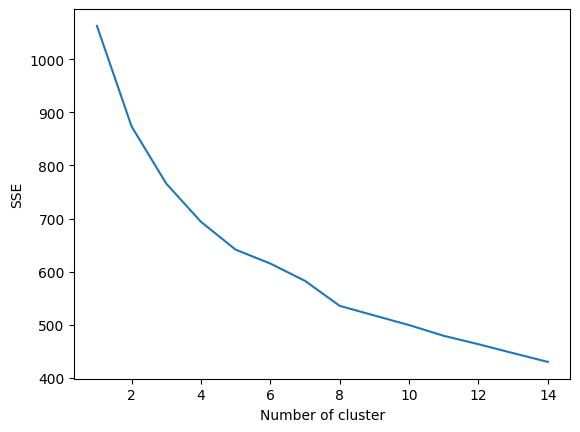

In [12]:
sse_kmod = {}
for k in range(1, 15):
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)
    sse_kmod[k] = kmeans.inertia_
    
plt.plot(range(1, 15), [sse_kmod[k] for k in range(1, 15)])
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


## From this graph I gather that the elbow point is 5. This seems to be the point at which the graph is levelling out. 

## Silhouette Score

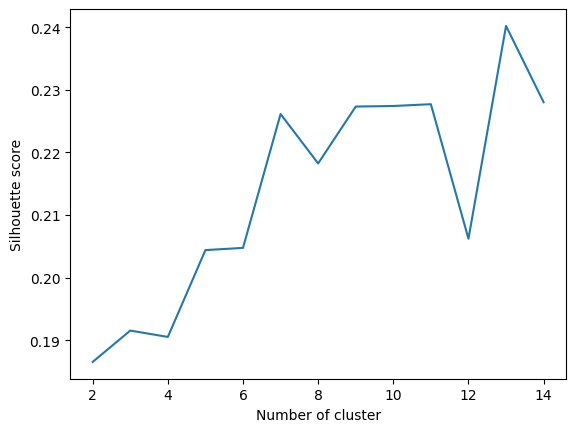

In [33]:
ss = {k: silhouette_score(data, cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit_predict(data))
      for k in range(2, 15)}

plt.plot(list(ss.keys()), list(ss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

## This silhouette score graph indicates that there is 13 clusters. 

## Rescale the data...

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

## Scatterplot

In [18]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

## Number of Clusters

In [35]:
k = 13

### Run k-means

In [36]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

## Apply a machine learning manifold to it.

In [37]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

## E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [38]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


## Multi-Dimensional Scaling

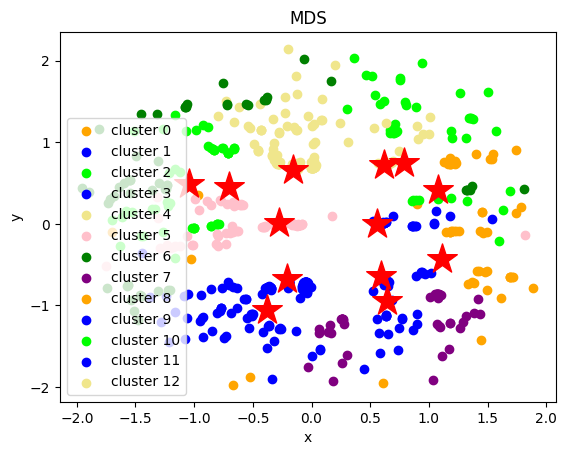

In [39]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

# t-SNE

In [40]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

C:\Users\jkevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jkevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


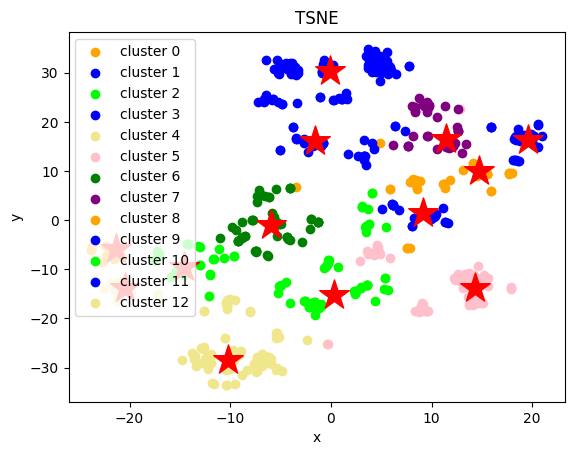

In [41]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

# Cluster Analysis

In [42]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [43]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  cluster  
0                    1              1     0.841086       12  
1                    0              0     0.871711        5  
2                    1              1     0.385189        4  
3                    1              1     0.717012        2  
4                    1              1     0.860305       12

In [44]:
df.tail()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
609    0.000000         0.666409    0.676143             0.750   
610    1.000000         0.858916    0.395858             0.375   
611    0.333333         1.313719    1.566110             0.750   
612    0.666667         1.267616    1.325676             0.750   
613    0.000000         0.925883    1.074155             0.750   

     Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
609               1            0           0            0            0   
610               1            1           0            1            0   
611               1            1           0            1            0   
612               1            1           0            1            0   
613               0            0           0            0            0   

     Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
609                  0                  0                       0   
610                  0                  0                       0   
611                  0                  0                       0   
612                  0                  0                       0   
613                  1                  0                       0   

     Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  TotalIncome  \
609                        0                    0              1     0.364708   
610                        0                    0              1     0.587496   
611                        0                    1              1     1.116075   
612                        0                    1              1     1.042256   
613                        1                    0              0     0.663523   

     cluster  
609        8  
610        5  
611        4  
612        4  
613        0

In [45]:
df.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.061728         0.863886    1.012855          0.738889   
1          0.089744         0.905692    1.050425          0.750000   
2          0.391304         0.799956    1.028182          0.676630   
3          0.371429         0.723123    0.946463          0.695000   
4          0.355556         0.978733    1.127862          0.695278   
5          0.309524         0.986964    1.181342          0.692500   
6          0.345029         0.907338    1.097777          0.708333   
7          0.139535         0.948953    1.051666          0.727907   
8          0.068966         0.816723    0.888140          0.745690   
9          0.297491         0.986765    1.156886          0.723118   
10         0.121212         0.876879    1.010383          0.735795   
11         0.066667         0.961293    1.059449          0.750000   
12         0.041667         0.884699    1.005690          0.692708   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.518519     0.148148    0.111111     0.222222     0.000000   
1              0.961538     1.000000    0.000000     0.000000     0.000000   
2              1.000000     0.956522    0.000000     1.000000     0.000000   
3              0.971429     0.914286    0.000000     0.685714     0.000000   
4              0.988889     0.944444    0.022222     1.000000     0.000000   
5              0.985714     0.971429    0.028571     1.000000     0.000000   
6              0.000000     0.929825    0.017544     0.877193     0.000000   
7              0.976744     0.000000    0.093023     0.418605     0.023256   
8              1.000000     0.000000    0.000000     0.000000     0.000000   
9              0.989247     1.000000    0.000000     1.000000     0.000000   
10             0.727273     0.681818    0.022727     0.022727     0.000000   
11             0.966667     1.000000    0.000000     0.000000     0.033333   
12             1.000000     1.000000    0.000000     0.000000     0.041667   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.148148           0.037037                0.074074   
1                 0.115385           0.076923                0.307692   
2                 0.130435           0.043478                1.000000   
3                 0.142857           0.028571                1.000000   
4                 0.100000           0.077778                0.000000   
5                 0.185714           0.057143                0.000000   
6                 0.140351           0.017544                0.333333   
7                 0.162791           0.093023                0.116279   
8                 0.103448           0.034483                0.137931   
9                 0.139785           0.021505                0.000000   
10                0.136364           0.068182                0.295455   
11                0.100000           0.066667                0.000000   
12                0.083333           0.083333                0.083333   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.703704             0.000000       0.000000   
1                       0.000000             0.000000       1.000000   
2                       0.000000             0.478261       0.717391   
3                       1.000000             0.000000       0.857143   
4                       0.000000             1.000000       0.833333   
5                       0.000000             0.000000       0.800000   
6                       0.228070             0.315789       0.000000   
7                       1.000000           